# Detecting Pneumonia using Convolutional Neural Network (CNN)

## Understand CNN

**What Is a Convolutional Neural Network?**
A Convolutional Neural Network  (CNN) is a type of neural network that specializes in image recognition and computer vision tasks.

---

**CNNs have two main parts**
1. A **convolution/pooling mechanism** that breaks up the image into features and analyzes them
2. A **fully connected (FC) layer** that takes the output of convolution/pooling and predicts the best label to describe the image

Resources: [Understanding the input and output shapes in CNN](https://towardsdatascience.com/understanding-input-and-output-shapes-in-convolution-network-keras-f143923d56ca)

---

**CNNs have several types of layers**
1. Convolutional layer ━ a “filter” passes over the image, scanning a few pixels at a time and creating a feature map that predicts the class to which each feature belongs.
2. Pooling layer (downsampling) ━ reduces the amount of information in each feature obtained in the convolutional layer while maintaining the most important information (there are usually several rounds of convolution and pooling).
3. Fully connected input layer (flatten) ━ takes the output of the previous layers, “flattens” them and turns them into a single vector that can be an input for the next stage.
4. The first fully connected layer ━ takes the inputs from the feature analysis and applies weights to predict the correct label.
5. Fully connected output layer ━ gives the final probabilities for each label.

---

**Ways to prevent overfitting**

**1. Regularization**
  - L2 (early-stopping) - stop training our model when the validation loss is at its lowest.
  
**2. Batch Normalization**
  - To increase the stability of a neural network, batch normalization normalizes the output of a previous activation layer by subtracting the batch mean and dividing by the batch standard deviation.
  - Batch normalization standardizes the inputs to a layer for each mini-batch, stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.
 
**3. Dropout**

**4. Data Augmentation**

---

**Normalize Pixel Values**
- For most image data, the pixel values are integers with values between 0 and 255. Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.
- It is valid for images to have pixel values in the range 0-1 and images can be viewed normally. This can be achieved by dividing all pixels values by the largest pixel value; that is 255. This is performed across all channels, regardless of the actual range of pixel values that are present in the image.

---

**Choosing steps per each training epoch or validation epoch**
- Before training or validating data, you will assign a **batch size**, which the model will train/test a smaller subset of data at a time. This is to **spare the computer's memory**.
- Steps per epoch means the number of batches/steps the model will use at once to compute the metrics. Ideally, we will test the  entire validation data at once. If we only test part of the validation data, we will get different metrics every time, either better or worse, however, it's not representative of the entire validation sets. 


## Import The Required Libraries

In [4]:
# basics
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Others
import os
from PIL import Image


## Conduct Simple Exploratory Data Analysis (EDA)

In [5]:
def listdir_nohidden(path):
    return [file for file in os.listdir(path) if not file.startswith('.')]

def num_files_in_directory(path):
    return len([file for file in os.listdir(path) if not file.startswith('.')])

In [6]:
project_path = "E:/Stored/Stored_Datasets"
train_path = project_path + "/chest_xray/train/"
val_path = project_path + "/chest_xray/val/"
test_path = project_path + "/chest_xray/test/"

In [7]:
train_normal_path = train_path + 'NORMAL/'
train_pneumonia_path = train_path + 'PNEUMONIA/'
train_normal_len = num_files_in_directory(train_normal_path)
train_pneumonia_len = num_files_in_directory(train_pneumonia_path)
train_sum_len = train_normal_len + train_pneumonia_len

print("[Train] Number of NORMAL Images: ", train_normal_len)
print("[Train] Number of PNEUMONIA Images: ", train_pneumonia_len)
print("[Train] Number of TOTAL Images: ", train_sum_len)

[Train] Number of NORMAL Images:  1341
[Train] Number of PNEUMONIA Images:  3875
[Train] Number of TOTAL Images:  5216


In [8]:
val_normal_path = val_path + 'NORMAL/'
val_pneumonia_path = val_path + 'PNEUMONIA/'

print("[Validation] Number of NORMAL Images: ", num_files_in_directory(val_normal_path))
print("[Validation] Number of PNEUMONIA Images: ", num_files_in_directory(val_pneumonia_path))
print("[Validation] Number of TOTAL Images: ", num_files_in_directory(val_normal_path) + num_files_in_directory(val_pneumonia_path))

[Validation] Number of NORMAL Images:  8
[Validation] Number of PNEUMONIA Images:  8
[Validation] Number of TOTAL Images:  16


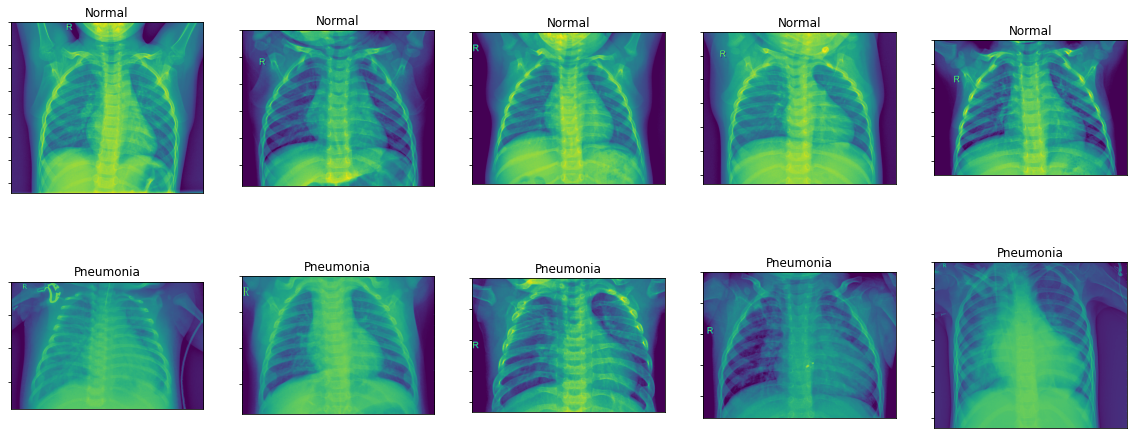

In [18]:
plt.figure(figsize=(20, 8))
num = 5
for index in range(num):
    n_img_title = os.listdir(train_normal_path)[index]
    n_img_path = train_normal_path + n_img_title
    
    plt.subplot(2, num, index+1)
    plt.imshow(Image.open(n_img_path))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    plt.title('Normal')
    ;
    
    p_img_title = os.listdir(train_pneumonia_path)[index]
    p_img_path = train_pneumonia_path + p_img_title
    
    plt.subplot(2, num, index+num+1)
    plt.imshow(Image.open(p_img_path))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    plt.title('Pneumonia')
    plt.savefig('pneumonia-fig.png')
    ;

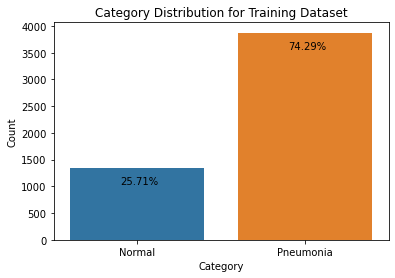

In [13]:
count_list = [['Normal', train_normal_len, train_normal_len/train_sum_len], \
              ['Pneumonia', train_pneumonia_len, train_pneumonia_len/train_sum_len]]
count_df = pd.DataFrame(count_list, columns=['Category', 'Count', 'Percentage'])
values = [train_normal_len, train_pneumonia_len]

ax = sns.barplot(x='Category', y='Count', data=count_df)
ax.set_title("Category Distribution for Training Dataset")

for index, value in enumerate(values):
    plt.text(index-0.1, value-300, str(round(value/sum(values)*100, 2)) + "%");

I notice that all images are in different sizes.

In [14]:
for index in range(20):  
    sample_image = train_normal_path + listdir_nohidden(train_normal_path)[index]
    image = Image.open(sample_image)
    width, height = image.size
    print('image', index+1, ':', width, 'x', height)

image 1 : 2090 x 1858
image 2 : 1422 x 1152
image 3 : 1810 x 1434
image 4 : 1618 x 1279
image 5 : 1600 x 1125
image 6 : 1974 x 1306
image 7 : 1528 x 1013
image 8 : 1384 x 1167
image 9 : 1450 x 1144
image 10 : 1468 x 993
image 11 : 1724 x 1581
image 12 : 1346 x 1044
image 13 : 1156 x 1237
image 14 : 1740 x 1453
image 15 : 2138 x 1928
image 16 : 1596 x 1156
image 17 : 2102 x 1974
image 18 : 1542 x 1152
image 19 : 1518 x 1156
image 20 : 1612 x 1133


In [15]:
hyper_dimension = 64
hyper_epochs = 100
hyper_feature_maps = 32
hyper_batch_size = 128

## Training in grayscale instead of RGB
hyper_channels = 1
hyper_mode = 'grayscale'


In [16]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0) 
test_datagen = ImageDataGenerator(rescale=1.0/255.0) 


train_generator = train_datagen.flow_from_directory(directory = train_path, 
                                                    target_size = (hyper_dimension, hyper_dimension),
                                                    batch_size = hyper_batch_size, 
                                                    color_mode = hyper_mode,
                                                    class_mode = 'binary', 
                                                    seed = 42)
val_generator = val_datagen.flow_from_directory(directory = val_path, 
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)
test_generator = test_datagen.flow_from_directory(directory = test_path, 
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)


NameError: name 'ImageDataGenerator' is not defined